In [5]:
! pip install matplotlib
! pip install seaborn
! pip install pandas
! pip install numpy

135.48s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


    ERROR: Command errored out with exit status 1:
     command: /Users/dandandan/opt/anaconda3/bin/python -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/private/var/folders/5r/wj27z5s171x11ww2d45zs7hm0000gp/T/pip-install-r_pdrkdz/sklearn_7b1f652394fd4c27b5f9f4c9127dad32/setup.py'"'"'; __file__='"'"'/private/var/folders/5r/wj27z5s171x11ww2d45zs7hm0000gp/T/pip-install-r_pdrkdz/sklearn_7b1f652394fd4c27b5f9f4c9127dad32/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base /private/var/folders/5r/wj27z5s171x11ww2d45zs7hm0000gp/T/pip-pip-egg-info-lg88dlks
         cwd: /private/var/folders/5r/wj27z5s171x11ww2d45zs7hm0000gp/T/pip-install-r_pdrkdz/sklearn_7b1f652394fd4c27b5f9f4c9127dad32/
    Complete output (18 lines):
    The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
    rather than 'sklearn' for pip commands.
    
    Here is

148.04s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


155.84s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


163.62s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


171.39s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


In [6]:
! pip install scikit-learn

196.09s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


In [1]:
# Preparation
import sklearn
import sklearn.datasets
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.datasets import fetch_openml
from sklearn.manifold import LocallyLinearEmbedding
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd
import numpy as np
from pathlib import Path


In [2]:
# Load the MNIST dataset
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
X = X / 255.0  # Normalize the pixel values to the range [0, 1]

In [3]:
# PCA initialization with 50
pca_x = PCA(n_components=50)
pca_embedding = pca_x.fit_transform(X)

In [6]:
# Reduce dimensionality using Hessian LLE
hlle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42, method = "hessian", eigen_solver='dense')
embedding = hlle.fit_transform(pca_embedding)

<AxesSubplot:xlabel='HLLE Dimension 1', ylabel='HLLE Dimension 2'>

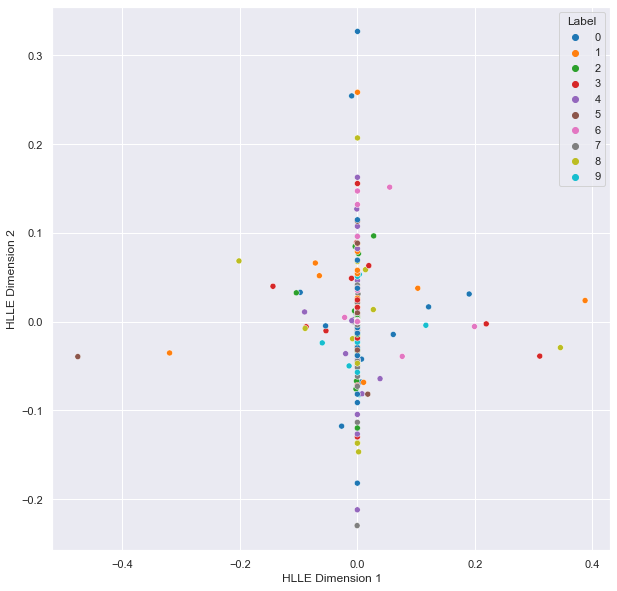

In [7]:
# Create a DataFrame for visualization
hlle_df = pd.DataFrame({
    'HLLE Dimension 1': embedding[:, 0],
    'HLLE Dimension 2': embedding[:, 1],
    'Label': y.astype(int)
})

# Plot the LLE visualization using seaborn
plt.figure(figsize=(10,10))
sns.scatterplot(data=hlle_df, x='HLLE Dimension 1', y='HLLE Dimension 2', hue='Label', palette='tab10')

In [8]:
# PCA initialization with 2
pca_x = PCA(n_components=2)
pca_embedding = pca_x.fit_transform(X)

In [9]:
embedding_2 = hlle.fit_transform(pca_embedding)

# Create a DataFrame for visualization
hlle_df = pd.DataFrame({
    'HLLE Dimension 1': embedding_2[:, 0],
    'HLLE Dimension 2': embedding_2[:, 1],
    'Label': y.astype(int)
})

# Plot the LLE visualization using seaborn
plt.figure(figsize=(10,10))
sns.scatterplot(data=hlle_df, x='HLLE Dimension 1', y='HLLE Dimension 2', hue='Label', palette='tab10')